# «Стримчик»

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Изучаем датафрейм `games.csv`. Описание данных:

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Задачи:
- Определить для пользователя каждого региона (NA, EU, JP):
    - Самые популярные платформы (топ-5). Опишите различия в долях продаж.
    - Самые популярные жанры (топ-5). Поясните разницу.
    - Влияет ли рейтинг ESRB на продажи в отдельном регионе?
- Проверить гипотезы
    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
    
- План работы:
    - Изучение данных
    - Предобработка данных
    - Анализ данных
    - Определение портрета пользователя
    - Проверка гипотез
    - Общий вывод

## Общая информация

### Загрузка модулей

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
import random

### Настройки

In [2]:
RANDOM_STATE = 12345
state = np.random.RandomState(RANDOM_STATE)
# Цветовая палитра документа
cm = 'crest'
mec = 'gray'
alpha = 0.7
fontsize = 14
figsize_base = 5

def new_color(x='r'):
    '''Цвет графиков, по умолчанию случайный из заданной цветовой палитры. Принимает в качестве аргумента число, \
    соответствующее цвету в палитре.'''
    if x == 'r':
        return list(sns.color_palette(cm, 20)[random.randint(0,19)])
    return list(sns.color_palette(cm, 20)[x])
# Размеры

def figsize(width = 1, height=1):
    '''Задание размеров окна отрисовки.'''
    return (width*figsize_base, height*figsize_base)

# Отрисовка 
def plot_set(ax,title='',xlabel='',ylabel='',fontsize=fontsize,xrot=True,figsize=figsize()):
    '''Функция для отрисовки дополнительных параметров графиков. Подписьи осей и названия, размер шрифта и размер окна, 
    включение сетки.'''
    plt.xticks(rotation=90*int(xrot), fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.title(title+'\n', fontsize=fontsize)
    plt.xlabel('\n'+xlabel, fontsize=fontsize)
    plt.ylabel(ylabel+'\n', fontsize=fontsize)
    plt.grid(True)
    None
    
def mean_percent(x):
    '''Функция для форматирования значений. Округление до сотых и знак процента.'''
    try:
        return "{0:.2%}".format(x)
    except:
        return x

### Загрузка данных

In [3]:
data = pd.read_csv('games.csv')

In [4]:
data.head(25)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [7]:
def mean_percent(x):
    try:
        return "{0:.2%}".format(x)
    except:
        return x

In [8]:
data.isna().mean().sort_values().apply(mean_percent)

Platform            0.00%
NA_sales            0.00%
EU_sales            0.00%
JP_sales            0.00%
Other_sales         0.00%
Name                0.01%
Genre               0.01%
Year_of_Release     1.61%
User_Score         40.09%
Rating             40.48%
Critic_Score       51.32%
dtype: object

In [9]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


### Вывод этапа

Изучен датафрейм `games.csv`:
- 11 столбцов:
    - `Name` — название игры
    - `Platform` — платформа
    - `Year_of_Release` — год выпуска
    - `Genre` — жанр игры
    - `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
    - `EU_sales` — продажи в Европе (миллионы проданных копий)
    - `JP_sales` — продажи в Японии (миллионы проданных копий)
    - `Other_sales` — продажи в других странах (миллионы проданных копий)
    - `Critic_Score` — оценка критиков (максимум 100)
    - `User_Score` — оценка пользователей (максимум 10)
    - `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
- 16715 строк
- Пропуски в строках:
    - `Platform` 0.00%
    - `NA_sales` 0.00%
    - `EU_sales` 0.00%
    - `JP_sales` 0.00%
    - `Other_sales` 0.00%
    - `Name` 0.01%
    - `Genre` 0.01%
    - `Year_of_Release` 1.61%
    - `User_Score` 40.09%
    - `Rating` 40.48%
    - `Critic_Score` 51.32%

## Предобработка данных

In [10]:
data.columns = [column.lower() for column in data.columns]

### Дубликаты

Посмотрим, есть ли явные дубликаты.

In [11]:
data.duplicated().sum()

0

Явные дубликаты отсутствуют

### Пропуски данных

Изучим пропуски данных.

In [12]:
data.isna().mean().sort_values().apply(mean_percent)

platform            0.00%
na_sales            0.00%
eu_sales            0.00%
jp_sales            0.00%
other_sales         0.00%
name                0.01%
genre               0.01%
year_of_release     1.61%
user_score         40.09%
rating             40.48%
critic_score       51.32%
dtype: object

In [13]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Пропуски в названии и жанре. Восстановить не получится, какую либо статистику получить тоже. И всего два таких на всю таблицу. Можно удалить.

In [14]:
data.dropna(subset=['name'], inplace=True)

In [15]:
data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Есть пропуски в годе выпуска

In [16]:
data.loc[data['year_of_release'].isna(),'name'].value_counts()

name
LEGO Harry Potter: Years 5-7    7
Happy Feet Two                  4
Rock Band                       4
Test Drive Unlimited 2          3
Bejeweled 3                     3
                               ..
Jet X20                         1
Tony Hawk's Downhill Jam        1
Tribes: Aerial Assault          1
Big Beach Sports 2              1
Hakuouki: Shinsengumi Kitan     1
Name: count, Length: 232, dtype: int64

In [17]:
data[data['name']=='Madden NFL 2004']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1881,Madden NFL 2004,XB,2003.0,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3889,Madden NFL 2004,GC,2003.0,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5708,Madden NFL 2004,GBA,2003.0,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E


Можно предположить, что пропуски можно заполнить на основе остальных столбцов.

In [18]:
for t in data.loc[data['year_of_release'].isna(),'name'].unique():
    if ~data.loc[(data['name'] == t), 'year_of_release'].isna().all():
        data.loc[(data['name'] == t) & (data['year_of_release'].isna()),'year_of_release'] = data.loc[data['name'] == t, 'year_of_release'].median()
data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T
1142,Rock Band,PS3,NaN,Misc,0.99,0.41,0.00,0.22,92.0,8.4,T
...,...,...,...,...,...,...,...,...,...,...,...
16277,Homeworld Remastered Collection,PC,NaN,Strategy,0.00,0.01,0.00,0.00,86.0,8.2,E10+
16288,Shorts,DS,NaN,Platform,0.01,0.00,0.00,0.00,NaN,tbd,E10+
16348,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Удалось сократить число пропусков с 269 до 146.

In [19]:
data.dropna(subset=['year_of_release'], inplace=True)

Рассмотрим столбец `rating`

In [20]:
data['rating'].value_counts()

rating
E       3958
T       2930
M       1554
E10+    1412
EC         8
K-A        3
RP         2
AO         1
Name: count, dtype: int64

Среди вариантов фигурируют устаревшие K-A и EC, их можно заменить на E. Рейтинг RP - неопределённый рейтинг "ожидается", заменим его на `Nan`

In [21]:
data['rating'] = data['rating'].replace(['EC','K-A'],'E')
data['rating'] = data['rating'].replace('RP',np.nan)

In [22]:
data[data['rating']=='AO']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
875,Grand Theft Auto: San Andreas,XB,2005.0,Action,1.26,0.61,0.0,0.09,93.0,8.6,AO


In [23]:
data[data['name']=='Grand Theft Auto: San Andreas']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
17,Grand Theft Auto: San Andreas,PS2,2004.0,Action,9.43,0.40,0.41,10.57,95.0,9,M
875,Grand Theft Auto: San Andreas,XB,2005.0,Action,1.26,0.61,0.00,0.09,93.0,8.6,AO
2115,Grand Theft Auto: San Andreas,PC,2005.0,Action,0.00,0.93,0.00,0.04,93.0,8.9,M
10311,Grand Theft Auto: San Andreas,X360,2008.0,Action,0.08,0.02,0.00,0.01,NaN,7.5,M


Можно заменить единственный рейтинг AO на M, поскольку рейинг только для взрослых встречается только на одной платформе.

In [24]:
data['rating'] = data['rating'].replace('AO','M')

Посмотрим, нельзя ли заполнить столбец рейтинга на основе игр с других платформ.

In [25]:
data['rating'].isna().sum()

6701

In [26]:
for t in data.loc[data['rating'].isna(),'name'].unique():
    if ~data.loc[(data['name'] == t), 'rating'].isna().all():
        data.loc[(data['name'] == t) & (data['rating'].isna()),'rating'] = data.loc[data['name'] == t, 'rating'].mode()
data['rating'].isna().sum()

6701

Не удалось.

Заменим отсутствующие значения на  "unknown" для дальнейшего изучения.

In [27]:
data['rating'] = data['rating'].fillna("unknown")

Отметим, что оценки пользователей и критиков таким способом дополнять было бы некорректно, поскольку на разных платформах может быть разное кацество графики, оптимизации и т.д. И всё это может влиять на оценки на каждой из платформ. 

### Изменения типов данных

In [28]:
data['critic_score'] = data['critic_score'].astype('Int64')
data['year_of_release'] = data['year_of_release'].astype('int')

Столбец `user_score` в формате `object`, нужно изменить на `float`. Но перед этим необходимо обработать значение `tbd` - это  "to be defined", оценка пока не определена. Заменим его на `NaN` для корректной обработки.

In [29]:
data['user_score'] = data['user_score'].replace('tbd',np.nan)
data['user_score'] = data['user_score'].astype('float')

### Добавление столбцов

In [30]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,<NA>,NaN,unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,<NA>,NaN,unknown,28.31


### Вывод этапа

- Изменены названия столбцов на нижний регистр
- Дубликатов не обнаружено
- Пропуски в столбце `year_of_release` заменены на моды по названиям. Удалось сократить пропуски с 269 до 146. Остальные строки с пропусками в `year_of_release` удалены.
- Удалены строки с пропусками в `Name` и `Genre`
- Заменены устаревшие значения рейтинга K-A и EC на E. Рейтинг RP - неопределённый рейтинг "ожидается", заменён на `Nan`
- Изменены типы данных `year_of_release` и `critic_score` на `int`, `user_score` на `float`. 
- Добавлен столбец `total_sales` с общими продажами по миру.

## Анализ данных

### Год релиза

Посмотрим на распределение релизов по годам.

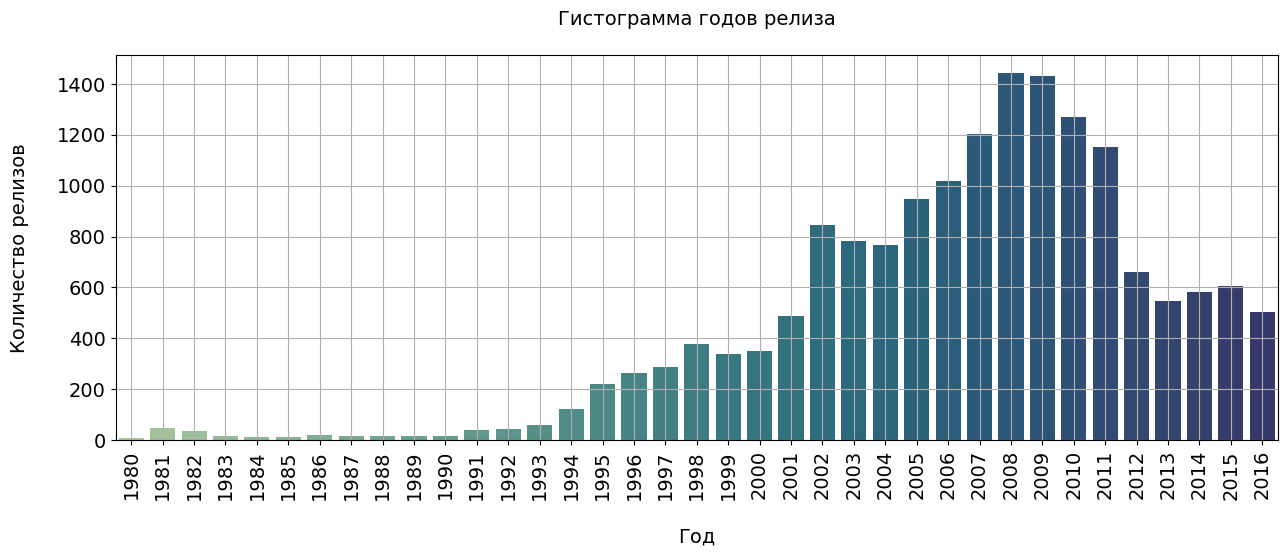

In [31]:
plt.figure(figsize=figsize(3))
pivot_years = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
ax = sns.barplot(x=pivot_years.index, y='name', data=pivot_years, hue=pivot_years.index, legend=False, palette=cm)
plot_set(ax,title='Гистограмма годов релиза',xlabel='Год',ylabel='Количество релизов')

Сравним с распределением количества проданных копий за каждый год.

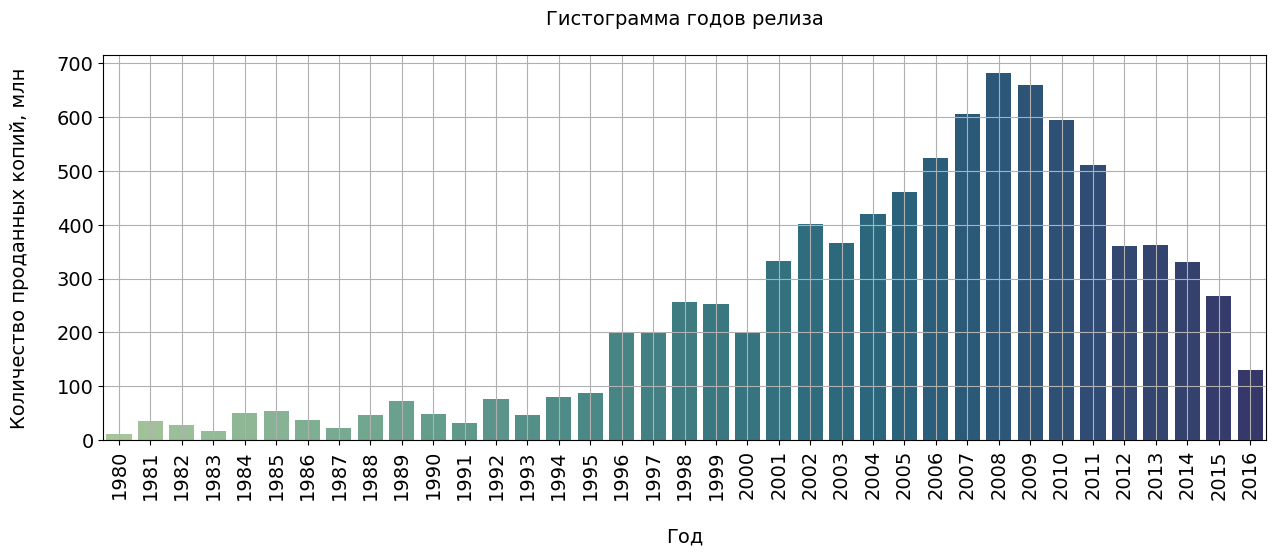

In [32]:
plt.figure(figsize=figsize(3))
pivot_years = data.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
sns.barplot(x=pivot_years.index, y='total_sales', data=pivot_years, palette=cm, hue=pivot_years.index, legend=False)
plot_set(ax,title='Гистограмма годов релиза',xlabel='Год',ylabel='Количество проданных копий, млн')

Картины похожи. Видно, число релизов начало резко расти с 1994 года. Но количество проданных копий начало расти с 1996. Пик приходится на 2008 - 2009 год.

### Платформы

Выясним, на каких платформах было продано больше всего игр.

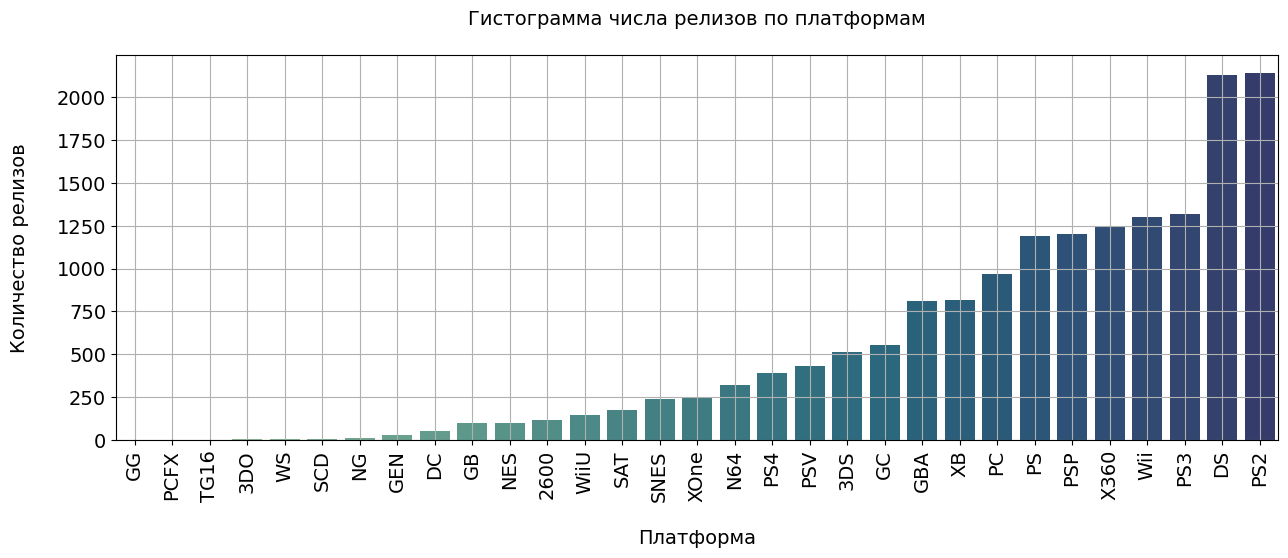

In [33]:
plt.figure(figsize=figsize(3))
pivot_platform = data.pivot_table(index='platform', values='name', aggfunc='count').sort_values(by='name')
sns.barplot(data=pivot_platform, x=pivot_platform.index, y='name', palette=cm, hue=pivot_platform.index, legend=False)
plot_set(ax,title='Гистограмма числа релизов по платформам',xlabel='Платформа',ylabel='Количество релизов')

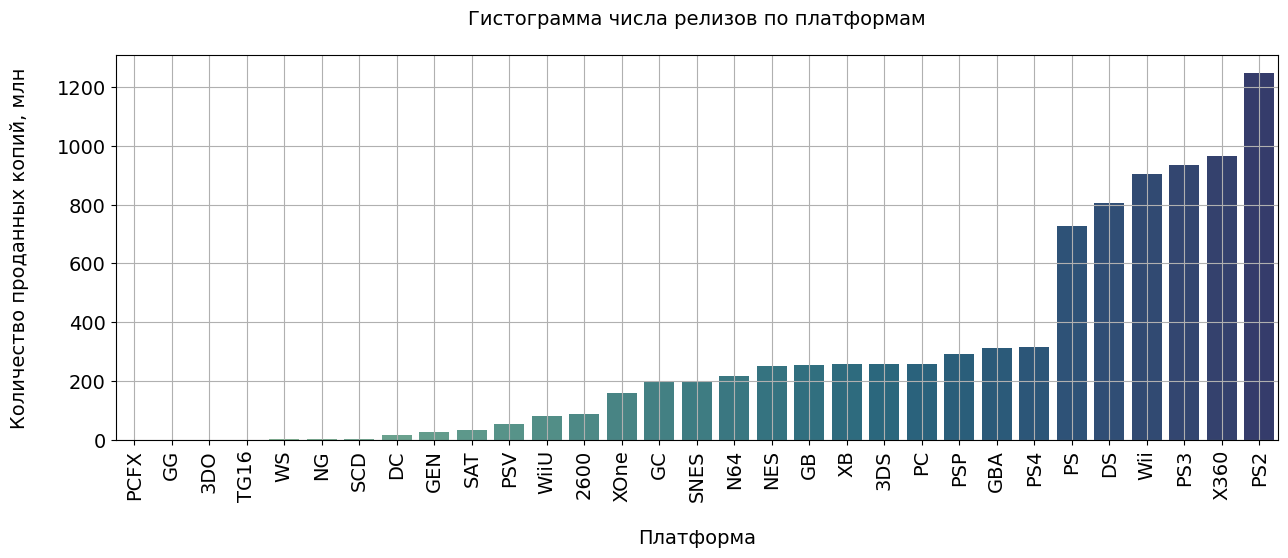

In [34]:
plt.figure(figsize=figsize(3))
pivot_platform = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales')
sns.barplot(data=pivot_platform, x=pivot_platform.index, y='total_sales', palette=cm, hue=pivot_platform.index, legend=False)
plot_set(ax,title='Гистограмма числа релизов по платформам',xlabel='Платформа',ylabel='Количество проданных копий, млн')

Наиболее успешные платформы по числу проданных копий:
- PS2
- X360
- PS3
- Wii
- DS
- PS

Посмотрим на периоды активности платформ. Посмотрим, когда появились первые игры на платформе, когда последние. Посчитаем ремя активности.

In [35]:
platform_period = pd.DataFrame({t : [data.loc[data['platform']==t, 'year_of_release'].min(), data.loc[data['platform']==t, 'year_of_release'].max(), data.loc[data['platform']==t, 'year_of_release'].max()-data.loc[data['platform']==t, 'year_of_release'].min() + 1] for t in data['platform'].unique()},index=["first", "last",'period']).T.sort_values(by='last')
platform_period.style.background_gradient(cmap=cm)

,first,last,period
GG,1992,1992,1
NES,1983,1994,12
SCD,1993,1994,2
GEN,1990,1994,5
3DO,1994,1995,2
TG16,1995,1995,1
PCFX,1996,1996,1
NG,1993,1996,4
SAT,1994,1999,6
2600,1980,1999,20


Покажем периоды активности в виде гистограмм, чтобы проследить динамику продаж. Разобъём платформы на блоки, поскольку все на одном графике показывать не очень информативно

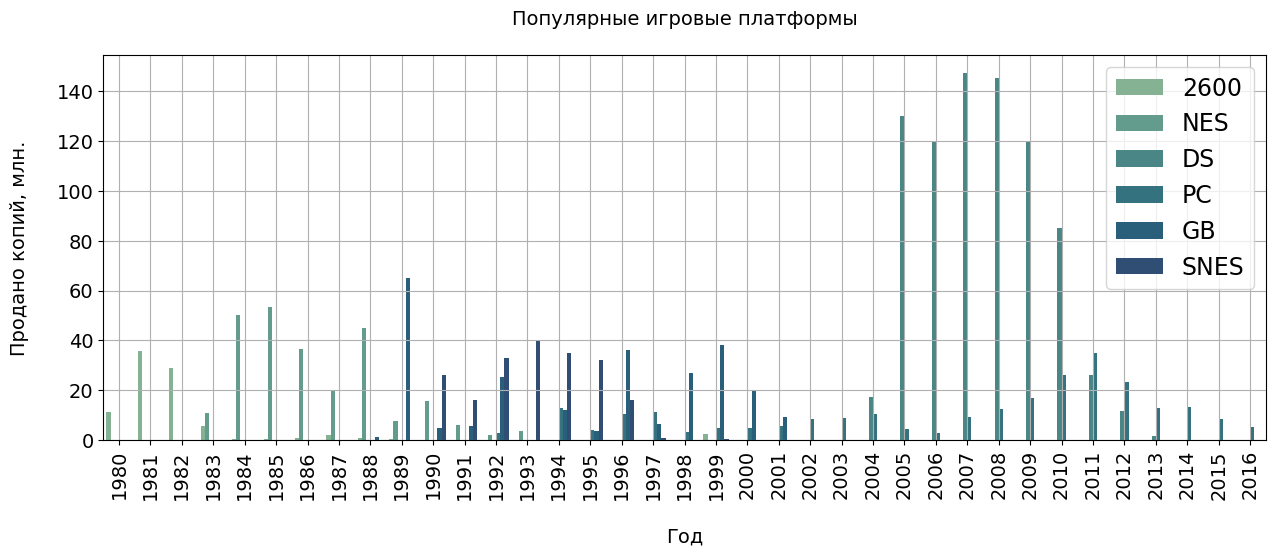

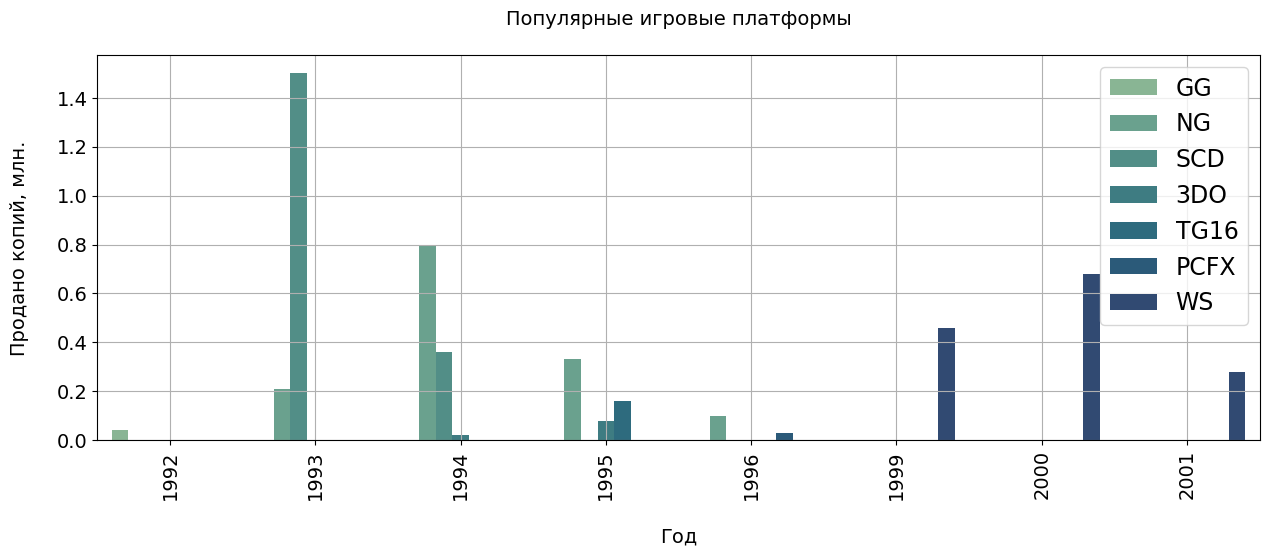

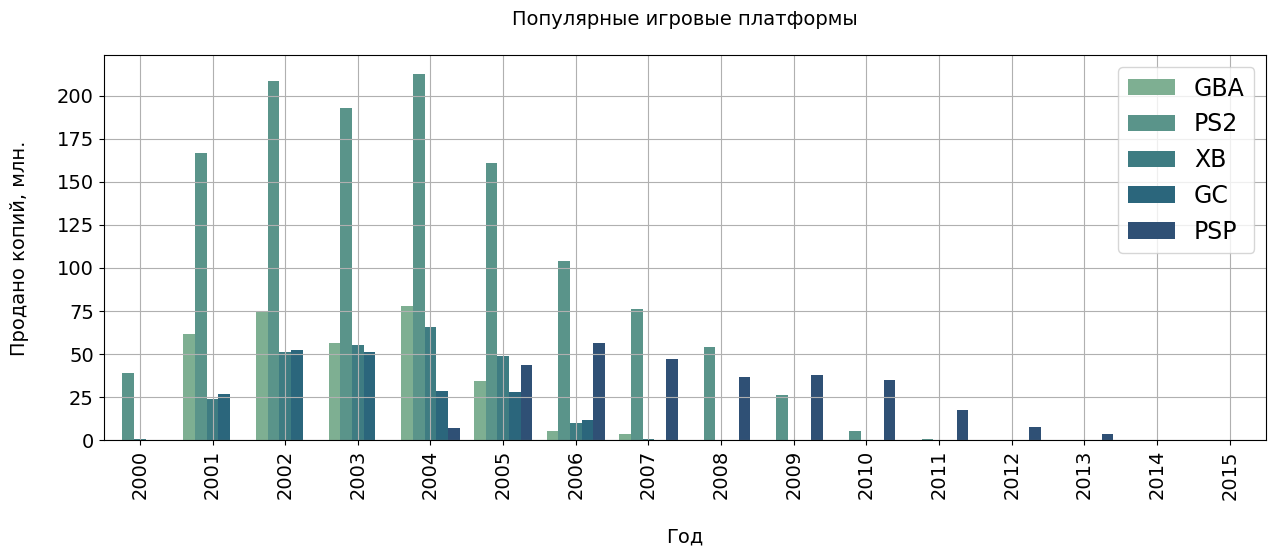

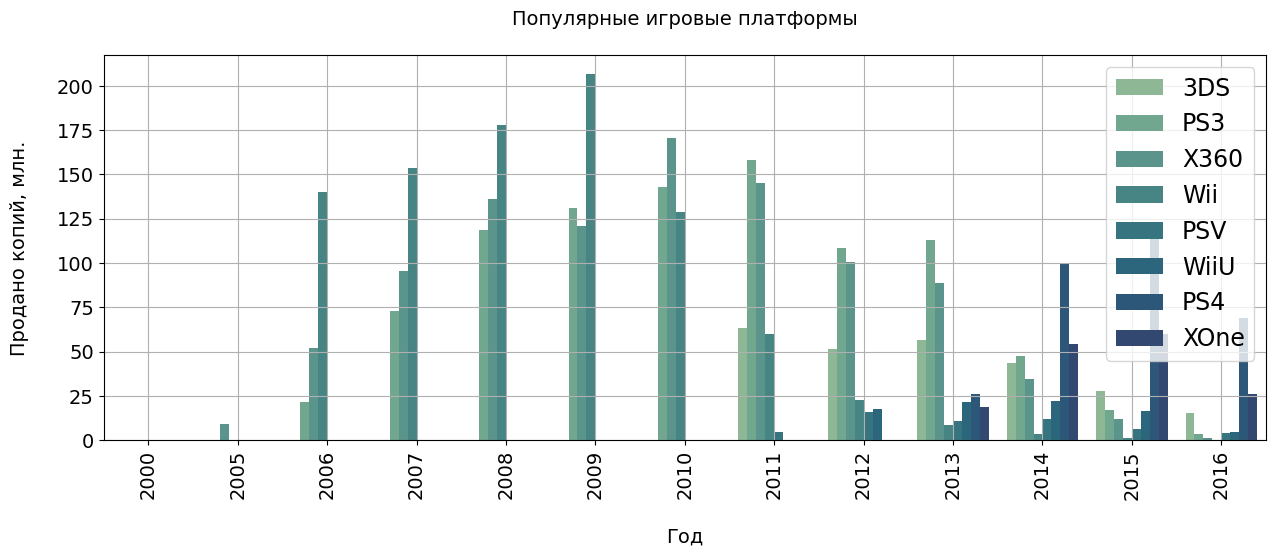

In [66]:
platform_by_years = data.pivot_table(index=['year_of_release','platform'], values='total_sales', aggfunc='sum')
platform_by_years.reset_index(inplace=True)
platform_block = [
    ['2600', 'PC', 'DS', 'GB', 'NES', 'SNES'],
    ['GG', 'TG16', 'PCFX', 'SCD', '3DO','NG', 'WS'],
    ['GBA','PS2','XB', 'GC', 'PSP'],
    ['3DS','PS3','X360','Wii','PSV','WiiU','PS4','XOne']
]
for i in range(4):
    plt.figure(figsize=figsize(3))
    ax=sns.barplot(data=platform_by_years[platform_by_years['platform'].isin(platform_block[i])], x='year_of_release', y='total_sales', hue='platform', palette=cm)
    plot_set(ax,title='Популярные игровые платформы',xlabel='Год',ylabel='Продано копий, млн.')
    plt.legend(loc='upper right', prop={'size': 17})

Как видим, у каждой игровой платформы есть срок жизни, который составляет в среднем около 8-10 лет, причем, как правило, первую половину этого периода продажи растут, а вторую половину - падают. Также отметим, что на 2016 год самые успешные платформы практически полностью потеряли свою актуальность.

In [37]:
platform_period['period'].describe()

count    31.000000
mean      9.387097
std       7.405752
min       1.000000
25%       4.000000
50%       9.000000
75%      12.000000
max      32.000000
Name: period, dtype: float64

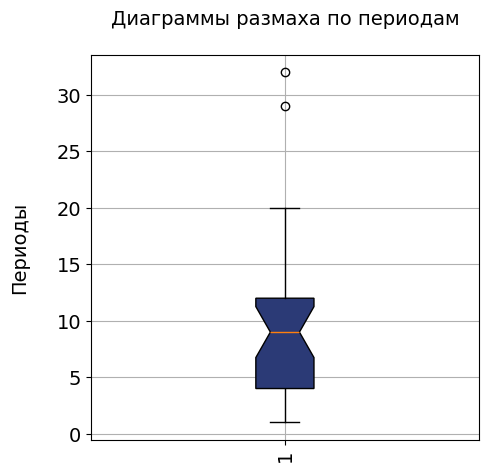

In [38]:
plt.figure(figsize=figsize())
plt.boxplot(platform_period['period'],notch = True,patch_artist = True, boxprops = dict(facecolor = new_color()))
plot_set(ax,title='Диаграммы размаха по периодам',ylabel='Периоды')
None

Будем считать 10 лет средним сроком жизни успешной платформы. Так как первую половину этого периода продажи платформы растут, а вторую половину - падают, то для поиска перспективных платформ целесообразно рассматривать период 5 лет. Будем считать это актуальным периодом, на основании данных которого можно строить проноз. В дальнейшем исследовании будем рассматривать период с 2011 по 2016 годы, так как данные за 2016 год могут быть неполными.

Как видим, имеется две перспективные ировые платформы. PS4 и XOne выходят на рынок в 2013 году и непрерывно наращивают продажи (данные за 2016 год моут быть неполными). Если учесть, что средний срок жизни популярной платформы составляет около 10 лет, то в 2017 году PS4 и XOne как раз могут выйти на пик популярности. Хотя продажи 3DS и WiiU снижаются, они все же сохраняются на относительно высоком уровне, будем считать эту платформу актуальной.

### Перспективные платформы

Нас интересует 2017 год. Период актуальности около 10 лет, поэтому построим гистограммы с 2011 года

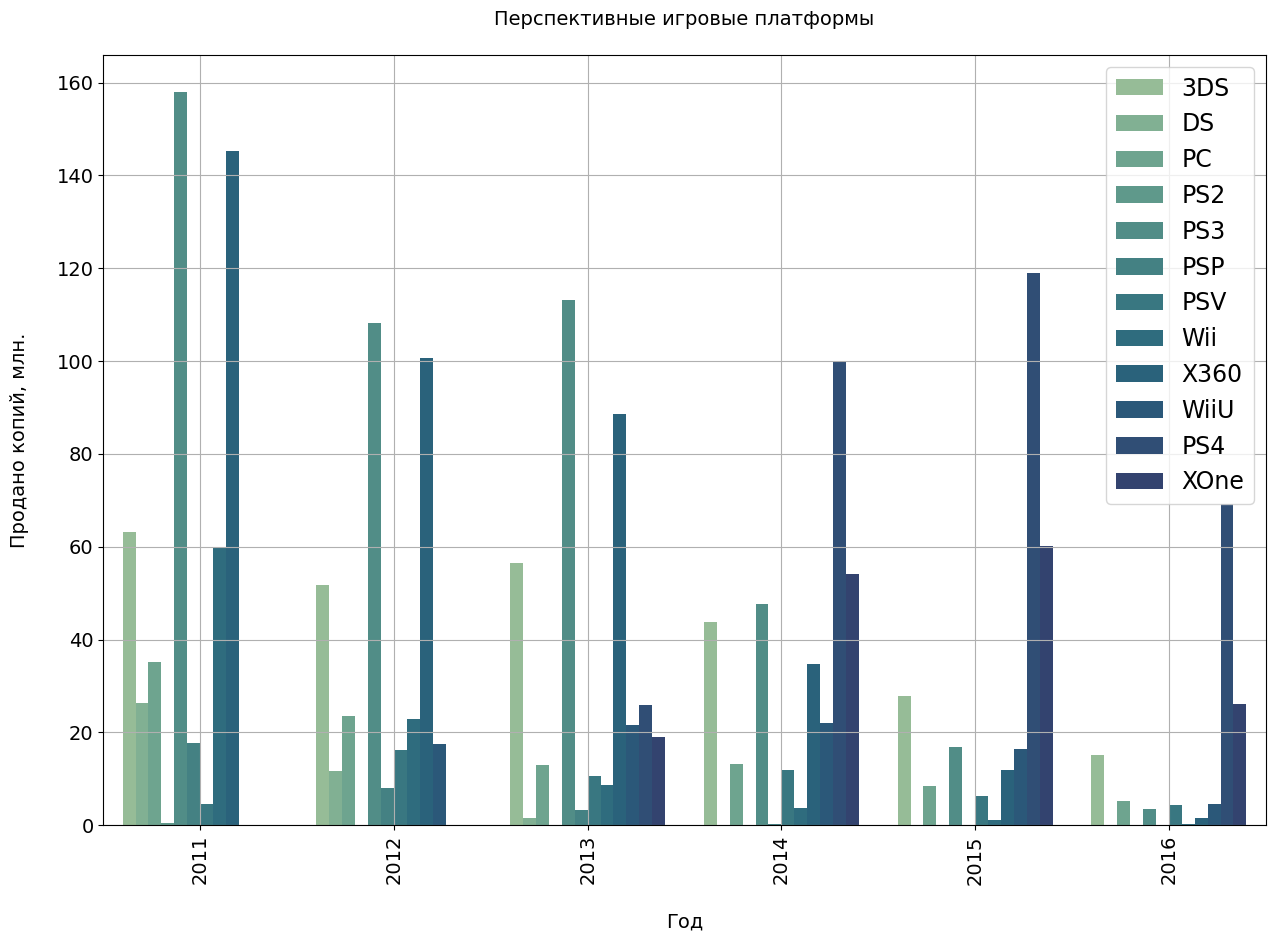

In [61]:
actual_data=data.loc[data['year_of_release'] >= 2011] # Общий датафрейм с актуальным периодом, потребуется в исследовании
# Ограничиваем год выпуска и исключаем уже рассмотренные платформы
platform_by_years = platform_by_years.loc[platform_by_years['year_of_release'] >= 2011]
# Строим график
plt.figure(figsize=figsize(3,2))
ax=sns.barplot(data=platform_by_years, x='year_of_release', y='total_sales', hue='platform', palette=cm)
plot_set(ax,title='Перспективные игровые платформы',xlabel='Год',ylabel='Продано копий, млн.')
plt.legend(loc='upper right', prop={'size': 17})
plt.show()

Актуальные (и перспективные) платформы:
- 3DS
- XOne
- PS4
- WiiU

Актуальные (и менее перспективные) платформы:
- PC
- PS3
- PSP
- PSV
- Wii


In [40]:
actual_platforms = ['3DS', 'XOne', 'PS4', 'WiiU', 'PC', 'PS3', 'PSP', 'PSV', 'Wii']
actual_data = data.loc[(data['year_of_release']>=2011)&data['platform'].isin(actual_platforms)]

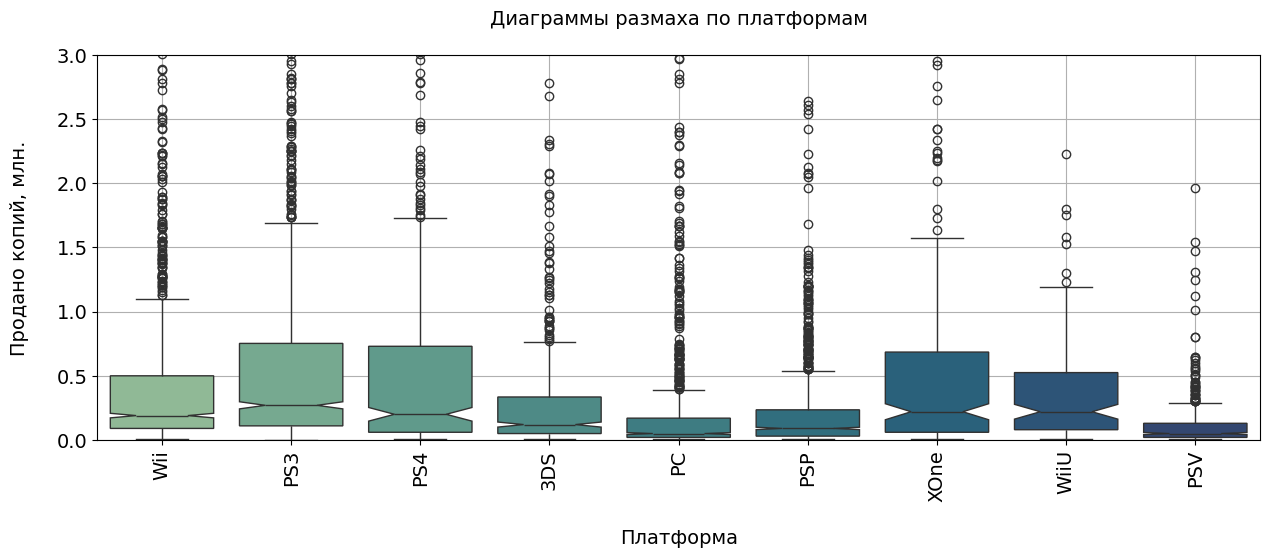

In [41]:
plt.figure(figsize=figsize(3))
sns.boxplot(x='platform', y='total_sales', data=data.loc[(data['platform'].isin(actual_platforms))],palette=cm,notch = True, hue='platform', legend=False)
plot_set(ax,title='Диаграммы размаха по платформам',xlabel='Платформа',ylabel='Продано копий, млн.')
plt.ylim(0,3)
plt.show()

Данные распределены несимметрично. Также наблюдаем большое количество выбросов. Это говорит о наличии бестселлеров - игр, которые продаются гораздо более массово других. Для платформ с особенно большим количеством выбросов, например 3DS, можно предположить, что значительная часть продаж осуществляется именно за счет бестселлеров. В то же время длинный "ящик" и "ус" в сочетании с относительно малым количеством выбросов, например у XOne, говорит нам о том, что пользователи покупают самые разные игры на этой платформе.

### Влияние отзывов на продажи

Рассмотрим платформу PS3 для изучения влияния отзывов на продажи.

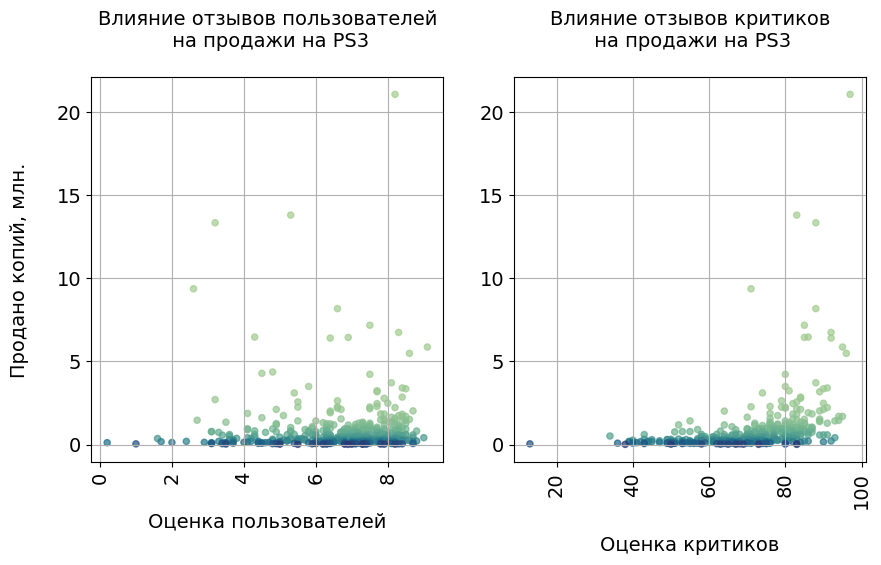

In [42]:
plt.figure(figsize=figsize(2))
ax1 = plt.subplot(1,2,1)
actual_data[(actual_data['platform']=='PS3')].plot(ax=ax1,x='user_score',y='total_sales',kind='scatter',color=sns.color_palette(cm, len(actual_data[(actual_data['platform']=='PS3')])),alpha=alpha)
plot_set(ax,title='Влияние отзывов пользователей\n на продажи на PS3',xlabel='Оценка пользователей',ylabel='Продано копий, млн.')
ax2 = plt.subplot(1,2,2)
actual_data[(actual_data['platform']=='PS3')].plot(ax=ax2,x='critic_score',y='total_sales',kind='scatter',color=sns.color_palette(cm, len(actual_data[(actual_data['platform']=='PS3')])),alpha=alpha)
plot_set(ax,title='Влияние отзывов критиков\n на продажи на PS3',xlabel='Оценка критиков')

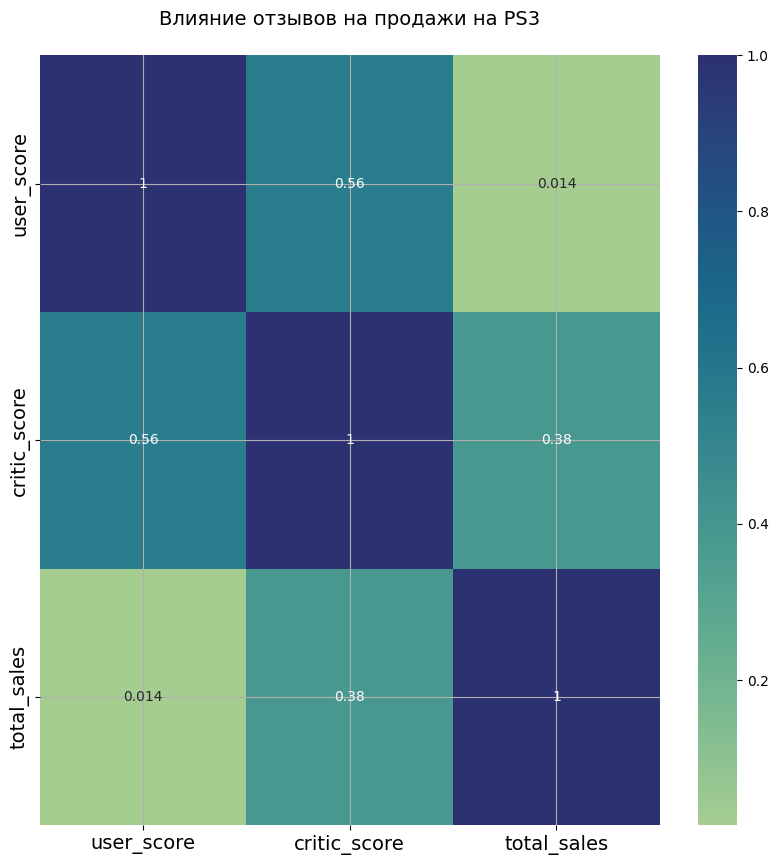

In [59]:
plt.figure(figsize=figsize(2,2))
sns.heatmap(actual_data.loc[(actual_data['platform']=='PS3'),['user_score', 'critic_score', 'total_sales']].corr(), cmap=cm, annot=True)
plot_set(ax,title='Влияние отзывов на продажи на PS3',xrot=False)

Число продаж имеет корреляцию с оценками критиков, практически не связана с оценками игроков.

### Влияние отзывов на продажи Vol. 2

Сравним эти данные с другими платформами.

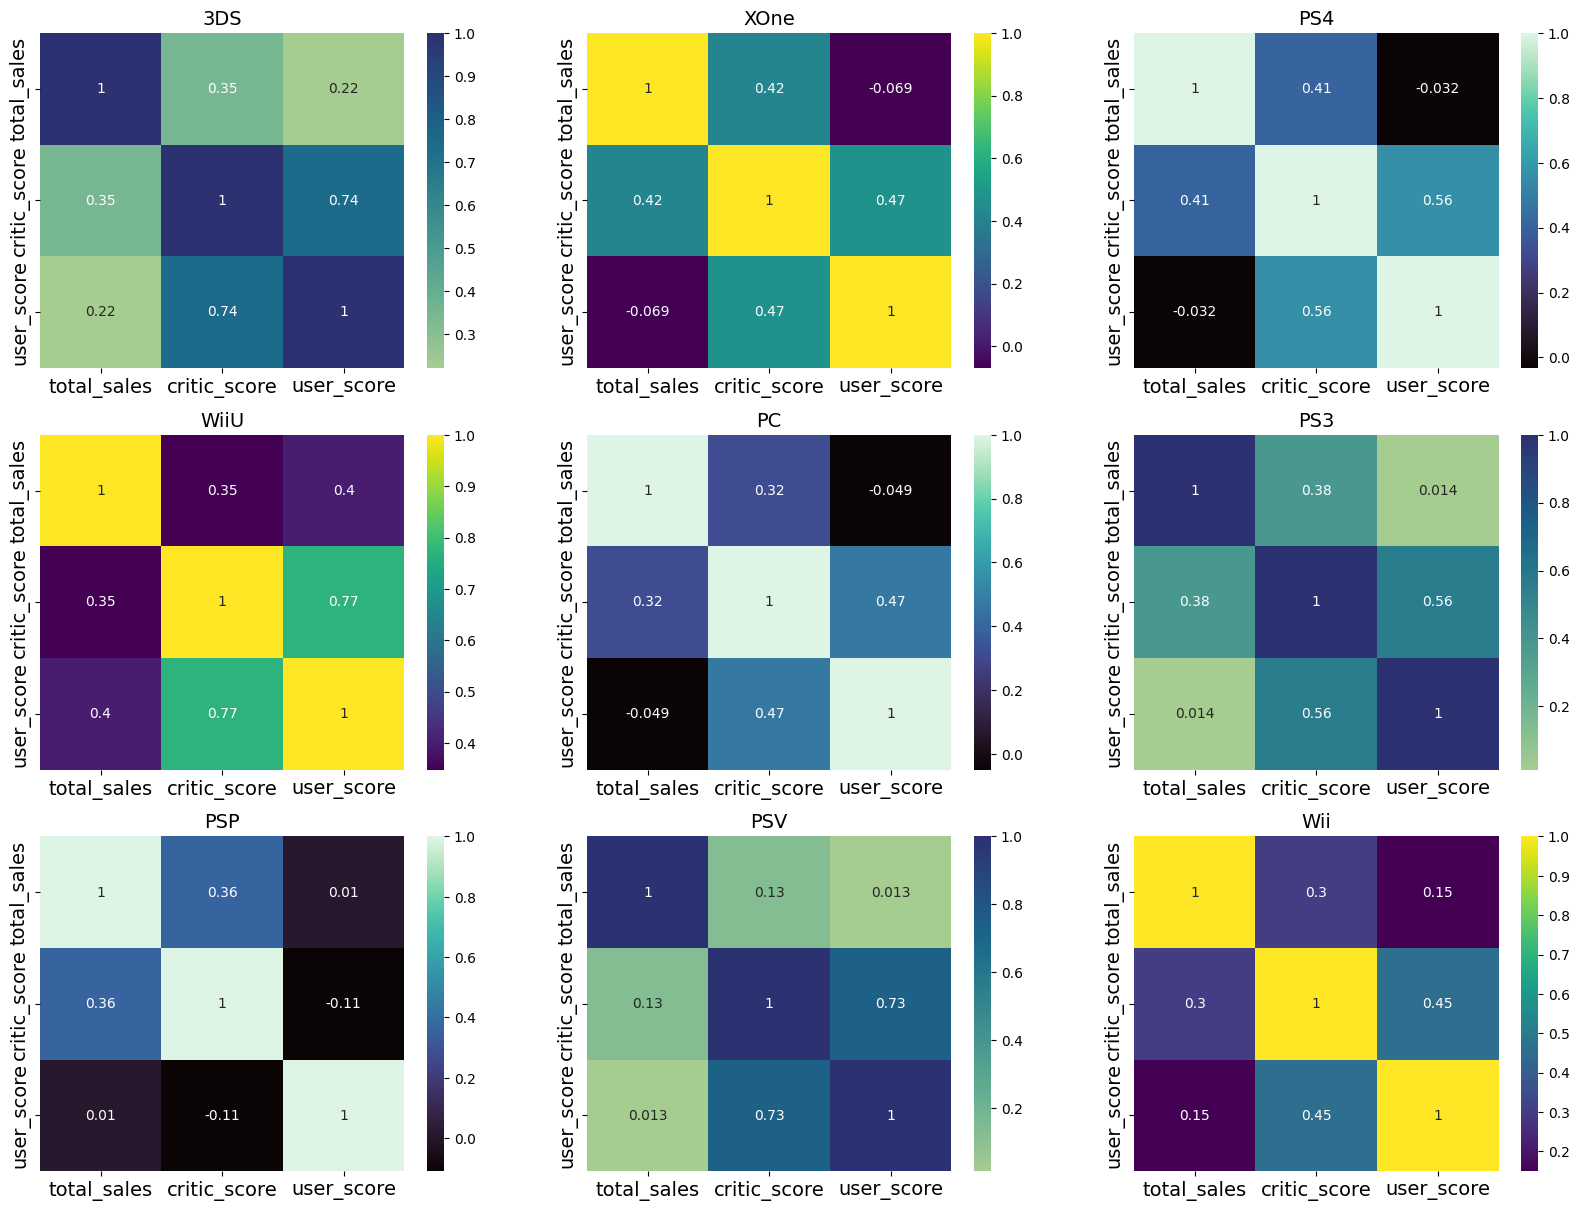

In [44]:
cmc=['crest','viridis',"mako", 'viridis',"mako",'crest', "mako",'crest','viridis']
k=0
plt.figure(figsize=figsize(4,4))
for t in actual_platforms:
    ax = plt.subplot(4,3,k+1)
    sns.heatmap(actual_data.loc[(actual_data['platform']==t),['total_sales', 'critic_score','user_score']].corr(), cmap=cmc[k], annot=True)
    k += 1
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    ax.set_title(t, fontsize=fontsize)
None

Картина похожа на предыдущую. Есть корреляция с оценками критиков, с оценками игроков связь слабая. Лишь на WiiU похоже есть корреляция с оценками игроков. 

### Жанры

Выясним, какие бывают жанры, насколько они массовы и как хорошо продаются.
Построим гистограмму числа релизов в зависимости от жанра.

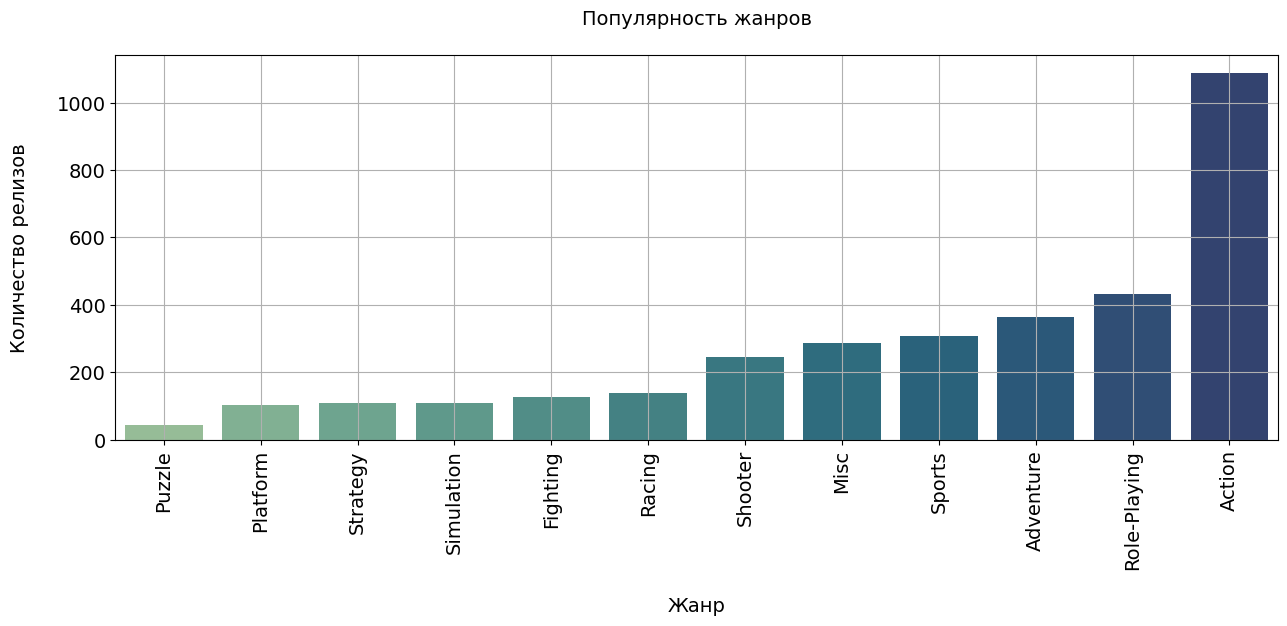

In [45]:
genres_sales=actual_data.pivot_table(index='genre', values='name', aggfunc='count').sort_values(by='name')
plt.figure(figsize=figsize(3))
ax=sns.barplot(data=genres_sales, x=genres_sales.index, y='name', palette=cm, hue=genres_sales.index, legend=False)
plot_set(ax,title='Популярность жанров',xlabel='Жанр',ylabel='Количество релизов')

Построим гистограмму проданных копий в зависимости от жанра.

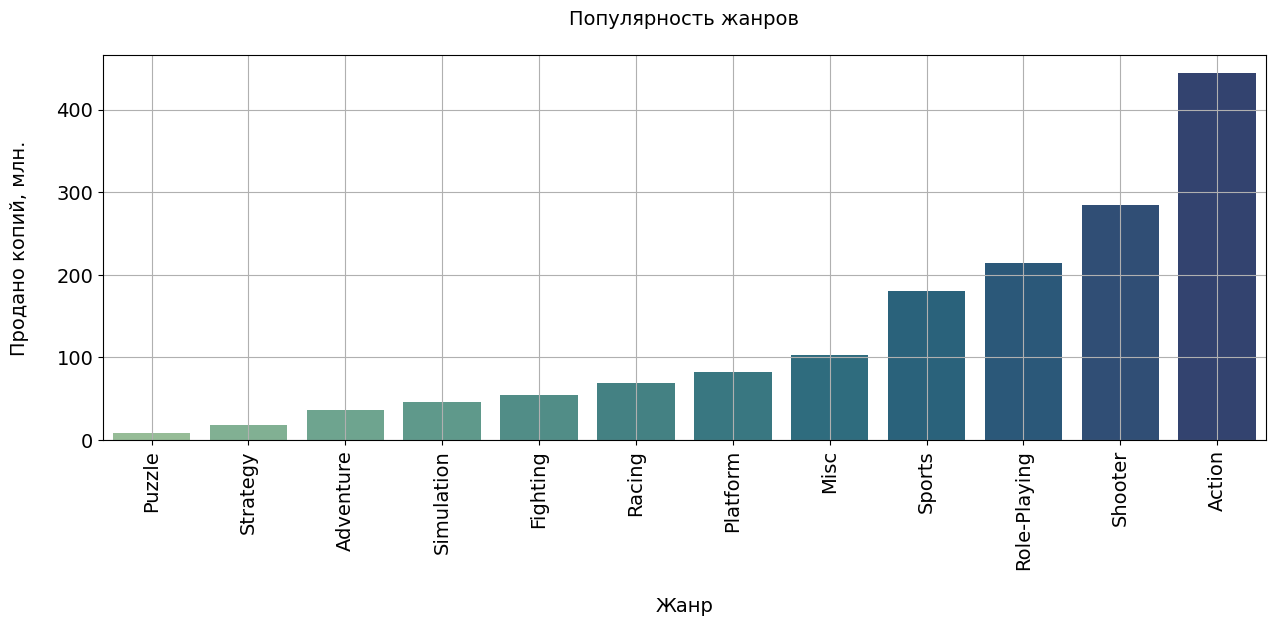

In [46]:
genres_sales=actual_data.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales')
plt.figure(figsize=figsize(3))
ax=sns.barplot(data=genres_sales, x=genres_sales.index, y='total_sales', palette=cm, hue=genres_sales.index, legend=False)
plot_set(ax,title='Популярность жанров',xlabel='Жанр',ylabel='Продано копий, млн.')

Общие продажи - плохая метрика для поиска наиболее прибыльного жанра. За высокими показателями общих продаж может скрываться множество мелких игр с низкими продажами. Или 2-3 звезды и куча провалов. Лучше найти жанр, где игры стабильно приносят высокий доход - для этого стоит рассмотреть средние или медианные продажи.

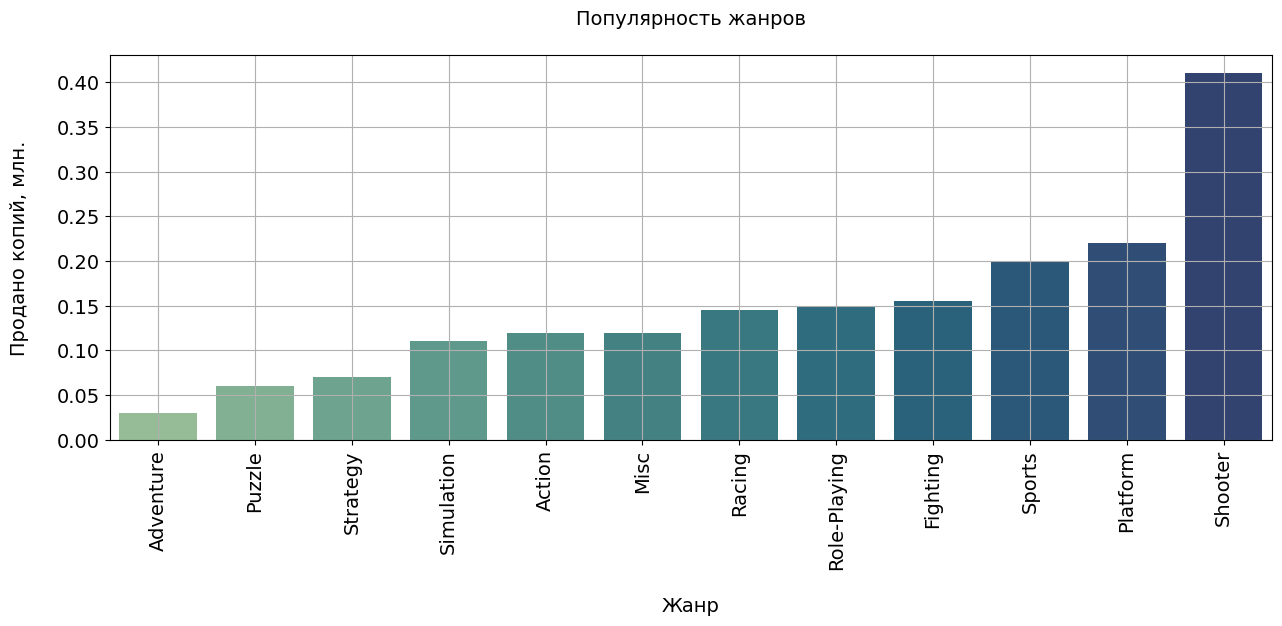

In [47]:
genres_sales=actual_data.pivot_table(index='genre', values='total_sales', aggfunc='median').sort_values(by='total_sales')
plt.figure(figsize=figsize(3))
ax=sns.barplot(data=genres_sales, x=genres_sales.index, y='total_sales', palette=cm, hue=genres_sales.index, legend=False)
plot_set(ax,title='Популярность жанров',xlabel='Жанр',ylabel='Продано копий, млн.')

Самые продаваемые жанры игр - Action, Shooter и Role-Playing. Самые продаваемые жанры среднем: Shooter, Platform и Sports.

### Вывод этапа

- Игровая индустрия начала активно развиваться с 1994 года - до этого объем выпущенных игр не превышал ста копий в год.
- Самые популярные игровые платформы до 2017 года - PS2, X360, PS3, Wii, DS и PS.
- Средний срок жизни популярной игровой платформы - 10 лет, с ростом в первые 5 лет и спадом в последующие. Исходя из этого, для поиска перспективных платформ целесообразно рассматривать пятилетний актуальный период.
- На 2016 год самые перспективные ировые платформы - PS4 и XOne; в 2017 году они могут выйти на пик продаж; платформа 3DS продолжает оставаться актуальной.
- Для большинства платформ характерен плавный рост продаж а затем плавный спад.
- Для каждой платформы существует большое количество игр-бестселлеров, их продажи могут превышать средние значения в десятки раз. Для определения перспективных категорий игр целесообразно оценивать медианные значения продаж.
- Существует прямая зависимость между отзывами критиков и объемом продаж. Связь между объемом продаж и отзывами пользователей зависит от игровой платформы, где-то она совсем отсутствует, а где-то даже сильнее зависимости от отзывов критиков, например на WiiU.
- Самые продаваемые жанры игр - Action, Shooter и Role-Playing, данные результаты получены за счет массовости жанров и большого количества бестселлеров. Самые продаваемы жанры в среднем - Shooter, Platform и Sports.

## Портрет пользователя

### Платформы

Выясним, какие платформы популярны в разных регионах, выделим топ-5 для каждого.

In [48]:
platform_region = actual_data.pivot_table(
    index='platform',values=['na_sales','eu_sales','jp_sales'],aggfunc='sum').sort_values(by='na_sales', ascending=False)

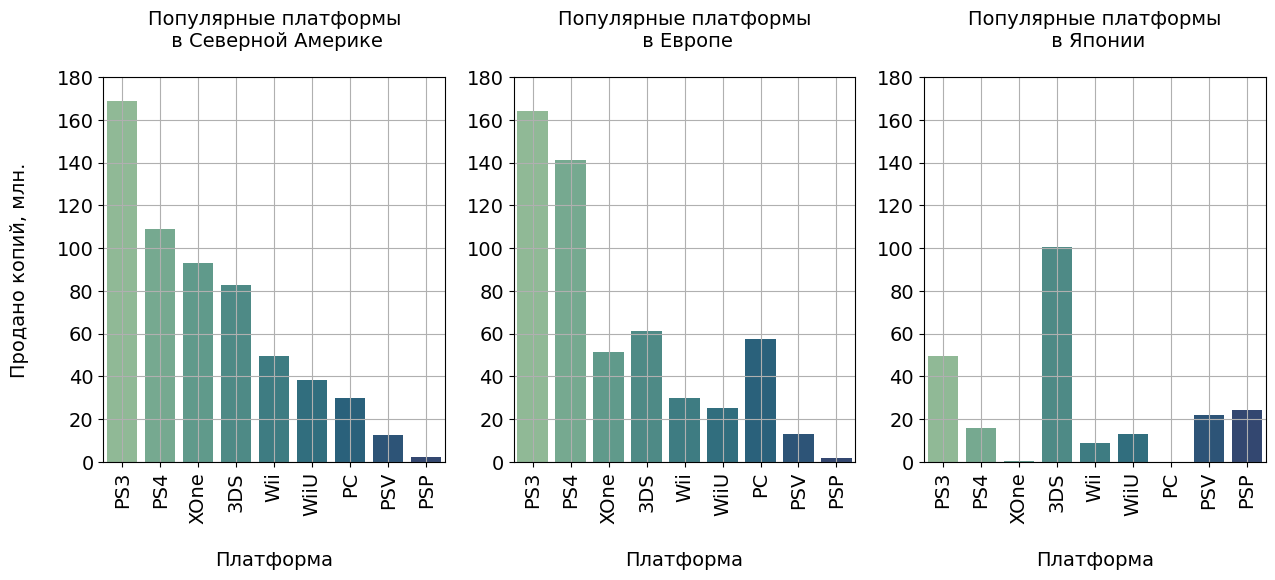

In [49]:
plt.figure(figsize=figsize(3))
ax1=plt.subplot(1,3,1)
sns.barplot(data=platform_region, x=platform_region.index, y='na_sales', palette=cm,ax=ax1, hue=platform_region.index, legend=False)
plot_set(ax1,title='Популярные платформы\n в Северной Америке',xlabel='Платформа',ylabel='Продано копий, млн.')
ax1.set(ylim=(0, 180))
ax2=plt.subplot(1,3,2)
sns.barplot(data=platform_region, x=platform_region.index, y='eu_sales', palette=cm,ax=ax2, hue=platform_region.index, legend=False)
plot_set(ax1,title='Популярные платформы\n в Европе',xlabel='Платформа')
ax2.set(ylim=(0, 180))
ax3=plt.subplot(1,3,3)
sns.barplot(data=platform_region, x=platform_region.index, y='jp_sales', palette=cm,ax=ax3, hue=platform_region.index, legend=False)
plot_set(ax1,title='Популярные платформы\n в Японии',xlabel='Платформа')
ax3.set(ylim=(0, 180))
None

In [50]:
for t in ['na_sales','eu_sales','jp_sales']:
    platform_region[t+'_per'] = (platform_region[t] / platform_region[t].sum()).apply(mean_percent)
platform_region.style.background_gradient(cmap=cm)

,eu_sales,jp_sales,na_sales,na_sales_per,eu_sales_per,jp_sales_per
platform,,,,,,
PS3,164.150000,49.400000,168.960000,28.84%,30.08%,21.07%
PS4,141.090000,15.960000,108.740000,18.56%,25.85%,6.81%
XOne,51.590000,0.340000,93.120000,15.89%,9.45%,0.15%
3DS,61.460000,100.620000,82.830000,14.14%,11.26%,42.92%
Wii,30.040000,8.970000,49.360000,8.42%,5.50%,3.83%
WiiU,25.130000,13.010000,38.100000,6.50%,4.60%,5.55%
PC,57.380000,0.000000,30.080000,5.13%,10.51%,0.00%
PSV,13.070000,21.840000,12.470000,2.13%,2.39%,9.32%
PSP,1.870000,24.280000,2.290000,0.39%,0.34%,10.36%


Лидеры продаж в США: PS3(29%), PS4(19%), XOne(16%), 3DS(14%), Wii(8%)

Лидеры продаж в Европе: PS3(30%), PS4(26%), 3DS(11%), PC(11%), XOne(9%)

Лидеры продаж в Японии: 3DS(43%), PS3(21%), PSP(10%), PSV(9%), PS4(7%)

### Жанры

In [51]:
genre_region = actual_data.pivot_table(
    index='genre',values=['na_sales','eu_sales','jp_sales'],aggfunc='sum').sort_values(by='na_sales', ascending=False)

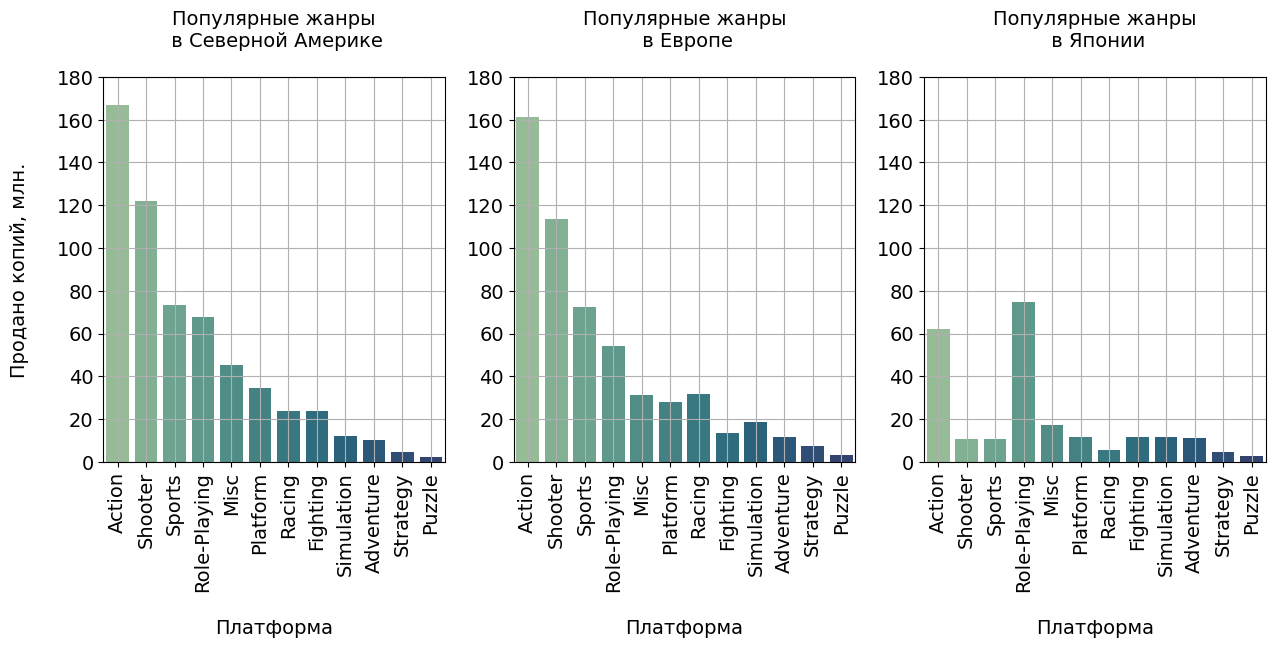

In [52]:
plt.figure(figsize=figsize(3))
ax1=plt.subplot(1,3,1)
sns.barplot(data=genre_region, x=genre_region.index, y='na_sales', palette=cm,ax=ax1, hue=genre_region.index, legend=False)
plot_set(ax1,title='Популярные жанры\n в Северной Америке',xlabel='Платформа',ylabel='Продано копий, млн.')
ax1.set(ylim=(0, 180))
ax2=plt.subplot(1,3,2)
sns.barplot(data=genre_region, x=genre_region.index, y='eu_sales', palette=cm,ax=ax2, hue=genre_region.index, legend=False)
plot_set(ax1,title='Популярные жанры\n в Европе',xlabel='Платформа')
ax2.set(ylim=(0, 180))
ax3=plt.subplot(1,3,3)
sns.barplot(data=genre_region, x=genre_region.index, y='jp_sales', palette=cm,ax=ax3, hue=genre_region.index, legend=False)
plot_set(ax1,title='Популярные жанры\n в Японии',xlabel='Платформа')
ax3.set(ylim=(0, 180))
None

In [53]:
for t in ['na_sales','eu_sales','jp_sales']:
    genre_region[t+'_per'] = (genre_region[t] / genre_region[t].sum()).apply(mean_percent)
genre_region.style.background_gradient(cmap=cm)

,eu_sales,jp_sales,na_sales,na_sales_per,eu_sales_per,jp_sales_per
genre,,,,,,
Action,161.080000,61.890000,166.720000,28.45%,29.51%,26.40%
Shooter,113.310000,10.850000,121.890000,20.80%,20.76%,4.63%
Sports,72.530000,10.760000,73.370000,12.52%,13.29%,4.59%
Role-Playing,54.190000,74.890000,67.550000,11.53%,9.93%,31.95%
Misc,31.200000,17.020000,45.230000,7.72%,5.72%,7.26%
Platform,27.910000,11.720000,34.730000,5.93%,5.11%,5.00%
Racing,31.930000,5.460000,23.660000,4.04%,5.85%,2.33%
Fighting,13.310000,11.650000,23.610000,4.03%,2.44%,4.97%
Simulation,18.650000,11.510000,11.960000,2.04%,3.42%,4.91%


Наблюдаем похожую ситуацию, но в данном случае топ-5 жанров для США и Европы почти совпадают. Отличия лишь в пятом месте. Разница в продажах между жанрами для этих стран так же небольшая. В Японии же предпочтения сильно отличаются, и снова есть лидеры с большим отрывом: Role-Playing и Action:
- Лидеры продаж в США: Action (28%), Shooter(21%), Sports(13%), Role-Playing(12%), Misc(6%)
- Лидеры продаж в Европе: Action(30%), Shooter(21%), Sports(13%), Role-Playing(10%), Racing(6%)
- Лидеры продаж в Японии: Role-Playing(32%), Action(26%), Misc(7%), Fighting(5%), Platform(5%)

В Японии объем рынка видеоигр значительно меньше, чем в Северной Америке и Европе, которые примерно равны друг другу.

### Рейтинг

Выясним, какие бывают рейтинги, какие из них самые массовые, и как они влияют на продажи в каждом регионе.

In [54]:
rating_region = actual_data.pivot_table(
    index='rating',values=['na_sales','eu_sales','jp_sales'],aggfunc='sum').sort_values(by='na_sales', ascending=False)

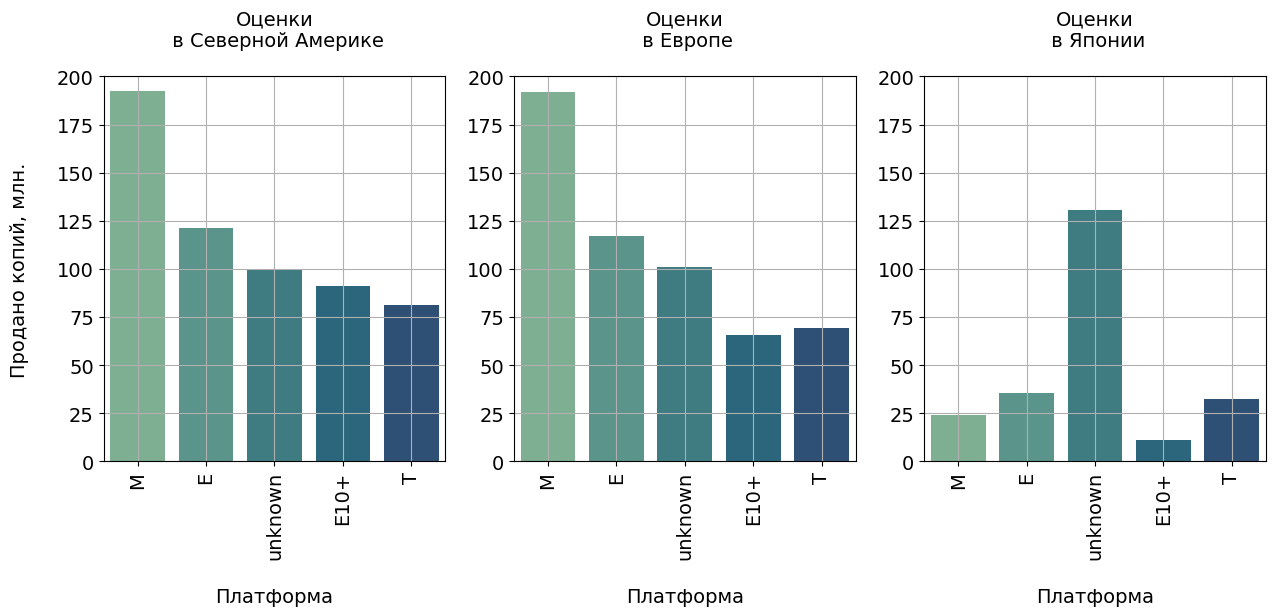

In [55]:
plt.figure(figsize=figsize(3))
ax1=plt.subplot(1,3,1)
sns.barplot(data=rating_region, x=rating_region.index, y='na_sales', palette=cm,ax=ax1, hue=rating_region.index, legend=False)
plot_set(ax1,title='Оценки\n в Северной Америке',xlabel='Платформа',ylabel='Продано копий, млн.')
ax1.set(ylim=(0, 200))
ax2=plt.subplot(1,3,2)
sns.barplot(data=rating_region, x=rating_region.index, y='eu_sales', palette=cm,ax=ax2, hue=rating_region.index, legend=False)
plot_set(ax1,title='Оценки\n в Европе',xlabel='Платформа')
ax2.set(ylim=(0, 200))
ax3=plt.subplot(1,3,3)
sns.barplot(data=rating_region, x=rating_region.index, y='jp_sales', palette=cm,ax=ax3, hue=rating_region.index, legend=False)
plot_set(ax1,title='Оценки\n в Японии',xlabel='Платформа')
ax3.set(ylim=(0, 200))
None

In [56]:
for t in ['na_sales','eu_sales','jp_sales']:
    rating_region[t+'_per'] = (rating_region[t] / rating_region[t].sum()).apply(mean_percent)
rating_region.style.background_gradient(cmap=cm)

,eu_sales,jp_sales,na_sales,na_sales_per,eu_sales_per,jp_sales_per
rating,,,,,,
M,192.110000,24.270000,192.430000,32.84%,35.20%,10.35%
E,117.150000,35.680000,121.300000,20.70%,21.46%,15.22%
unknown,101.170000,130.620000,99.650000,17.01%,18.54%,55.72%
E10+,65.950000,11.190000,91.110000,15.55%,12.08%,4.77%
T,69.400000,32.660000,81.460000,13.90%,12.72%,13.93%


Лидеры продаж в США: 
- M(33%), E(21%), E10(16%), T(14%)

Лидеры продаж в Европе: 
- M(35%), E(22%), T(13%), E10(12%)

Лидеры продаж в Японии: 
- E(15%), T(14%), M(10%), E10(5%) Но больше всего покупаются релизы без оценки

### Вывод этапа

Портрет среднего пользователя из США:

- Играет на платформе PS3(29%), PS4(19%), XOne(16%), 3DS(14%), Wii(8%)
- Предпочитает жанры Action (28%), Shooter(21%), Sports(13%), Role-Playing(12%), Misc(6%)
- Покупает игры с рейтингами M(33%), E(21%), E10(16%), T(14%)

Портрет среднего пользователя из Европы:

- Играет на платформе PS3(30%), PS4(26%), 3DS(11%), PC(11%), XOne(9%)
- Предпочитает жанры Action(30%), Shooter(21%), Sports(13%), Role-Playing(10%), Racing(6%)
- Покупает игры с рейтингами M(35%), E(22%), T(13%), E10(12%)

Портрет среднего пользователя из Японии:

- Играет на платформе 3DS(43%), PS3(21%), PSP(10%), PSV(9%), PS4(7%)
- Предпочитает жанры Role-Playing(32%), Action(26%), Misc(7%), Fighting(5%), Platform(5%)
- Покупает игры с рейтингами E(15%), T(14%), M(10%), E10(5%)
- Игр без рейтинга существенно больше, чем игр с рейтингом (56%). И больше чем у представителей других стран (17% и 19% для Америки и Европы соответственно).



## Проверка гипотез

Выполним проверку гипотез. Будем использовать метод ttest_ind поскольку выборки независимы. Пороговое значение $\alpha$ примем равным 5%

### Средние пользовательские рейтинги платформ Xbox One и PC

Нулевая гипотеза: средние пользовательские оценки Xbox One и PC одинаковые

Альтернативная гипотеза: средние пользовательские оценки Xbox One и PC разные

p-Value: 0.7
Не удалось отвергнуть нулевую гипотезу


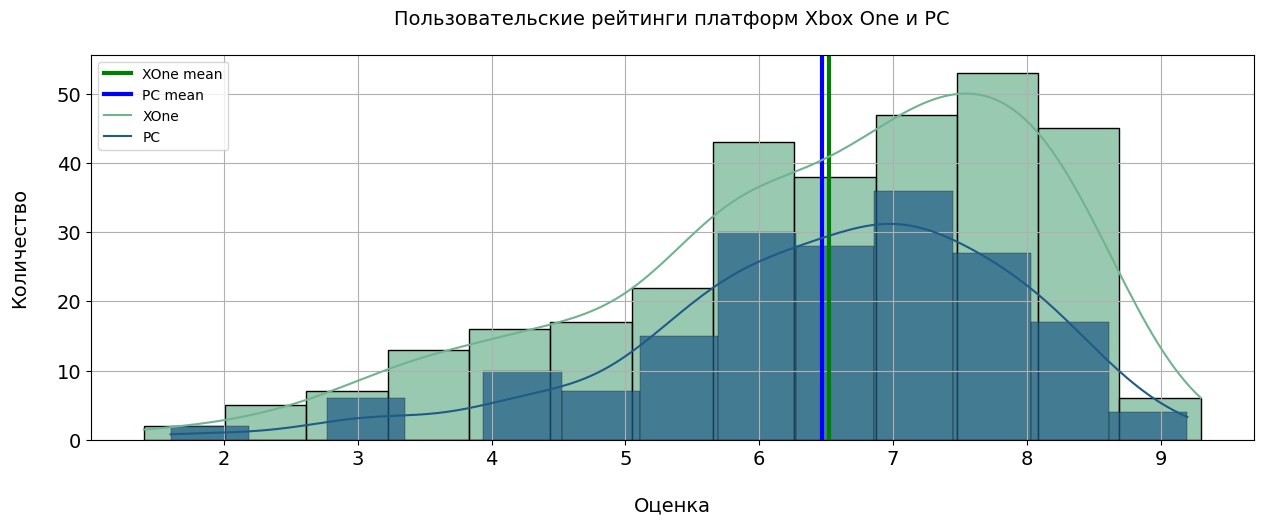

In [57]:
plt.figure(figsize=figsize(3))
rating_xone = actual_data.loc[data['platform'] == 'XOne','user_score'].dropna() # Сформируем выборки рейтингов для разных платформ
rating_pc = actual_data.loc[data['platform'] == 'PC','user_score'].dropna() # Удалим пропуски
plt.axvline(x = rating_xone.mean(), color = 'g',linewidth=3)
plt.axvline(x = rating_pc.mean(), color = 'b',linewidth=3)
sns.histplot(rating_pc,color=new_color(3),alpha=alpha,kde=True)
sns.histplot(rating_xone,color=new_color(15),alpha=alpha,kde=True,linewidth=0.2)
plot_set(ax1,title='Пользовательские рейтинги платформ Xbox One и PC',xlabel='Оценка',ylabel='Количество',xrot=False)
plt.legend(['XOne mean','PC mean','XOne','PC'])
Alpha = 0.05
results = st.ttest_ind(rating_xone, rating_pc)
print('p-Value:', results.pvalue.round(2))

if results.pvalue < Alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

Даже если средние значения рейтингов не равны, с вероятностью более 62% такое, или большее различие можно получить случайно, соответственно у нас нет оснований полагать, что средние пользовательские рейтинги платформ Xbox One и PC значимо отличаются.

### Средние пользовательские рейтинги жанров Action и Sports

Проверим гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные.

Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports одинаковы.

Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports отличаются.

p-Value: 8.600331479656237e-19
Отвергаем нулевую гипотезу


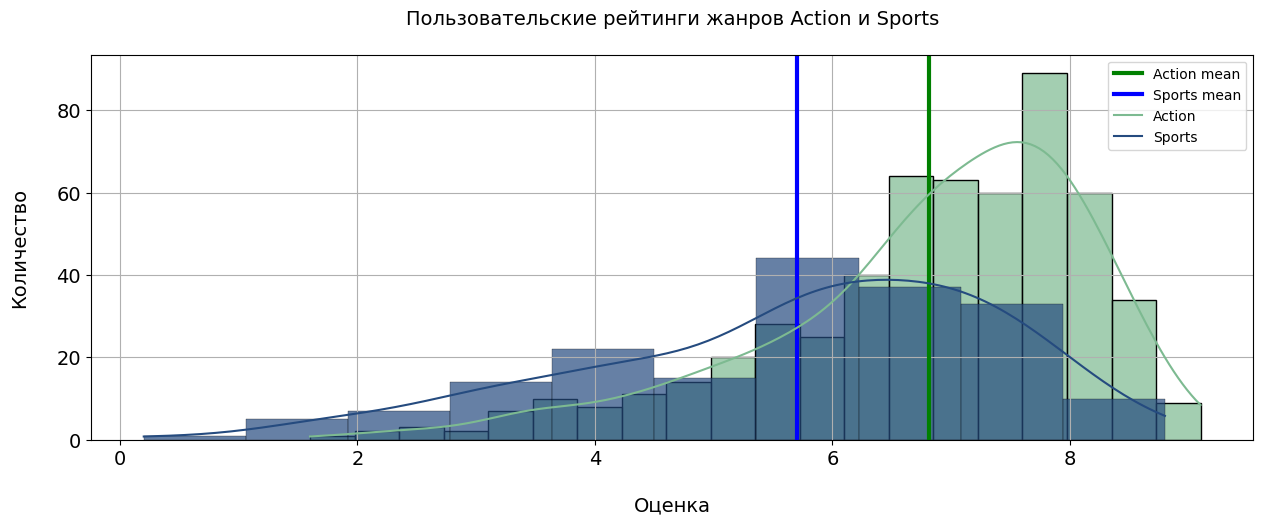

In [58]:
plt.figure(figsize=figsize(3))
rating_action = actual_data.loc[data['genre'] == 'Action','user_score'].dropna()
rating_sports = actual_data.loc[data['genre'] == 'Sports','user_score'].dropna()

plt.axvline(x = rating_action.mean(), color = 'g',linewidth=3)
plt.axvline(x = rating_sports.mean(), color = 'b',linewidth=3)
sns.histplot(rating_action,color=new_color(2),alpha=alpha,kde=True)
sns.histplot(rating_sports,color=new_color(17),alpha=alpha,kde=True,linewidth=0.2)
plot_set(ax1,title='Пользовательские рейтинги жанров Action и Sports',xlabel='Оценка',ylabel='Количество',xrot=False)
plt.legend(['Action mean','Sports mean','Action','Sports'])

Alpha = 0.05
results = st.ttest_ind(rating_action, rating_sports)
print('p-Value:', results.pvalue)

if results.pvalue < Alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

Отвергаем нулевую гипотезу, таким образом, средние пользователские рейтинги для жанров Action и Sports отличаются. Можно предположить, что в среднем рейтинги Action выше.

## Общий вывод

- Изучены данные датафрейма `games.csv`:
    - Изменены названия столбцов на нижний регистр
    - Дубликатов не обнаружено
    - Пропуски в столбце `year_of_release` заменены на моды по названиям. Удалось сократить пропуски с 269 до 146. Остальные строки с пропусками в `year_of_release` удалены.
    - Удалены строки с пропусками в `Name` и `Genre`
    - Заменены устаревшие значения рейтинга K-A и EC на E. Рейтинг RP - неопределённый рейтинг "ожидается", заменён на `Nan`
    - Изменены типы данных `year_of_release` и `critic_score` на `int`, `user_score` на `float`. 
    - Добавлен столбец `total_sales` с общими продажами по миру.
- Игровая индустрия начала активно развиваться с 1994 года - до этого объем выпущенных игр не превышал ста копий в год.
- Самые популярные игровые платформы до 2017 года - PS2, X360, PS3, Wii, DS и PS.
- Средний срок жизни популярной игровой платформы - 10 лет, с ростом в первые 5 лет и спадом в последующие. Исходя из этого, для поиска перспективных платформ целесообразно рассматривать пятилетний актуальный период.
- На 2016 год самые перспективные ировые платформы - PS4 и XOne; в 2017 году они могут выйти на пик продаж; платформы 3DS и WiiU продолжают оставаться актуальными.
- Для большинства платформ характерен плавный рост продаж а затем плавный спад.
- Для каждой платформы существует большое количество игр-бестселлеров, их продажи могут превышать средние значения в десятки раз. Для определения перспективных категорий игр целесообразно оценивать медианные значения продаж.
- Существует прямая зависимость между отзывами критиков и объемом продаж (коэффициент корреляции около 0.4 для многих платформ). Связь между объемом продаж и отзывами пользователей зависит от игровой платформы, где-то она совсем отсутствует, а где-то даже сильнее зависимости от отзывов критиков, например на WiiU.
- Самые продаваемые жанры игр - Action, Shooter и Role-Playing, данные результаты получены за счет массовости жанров и большого количества бестселлеров. Самые продаваемы жанры в среднем - Shooter, Platform и Sports.

- Портреты пользователей
    - Портрет среднего пользователя из США:

        - Играет на платформе PS3 (29%), PS4 (19%), XOne (16%), 3DS (14%), Wii (8%)
        - Предпочитает жанры Action (28%), Shooter (21%), Sports (13%), Role-Playing (12%), Misc (6%)
        - Покупает игры с рейтингами M (32%), E (20%), E10 (15%), T (14%)

    - Портрет среднего пользователя из Европы:

        - Играет на платформе PS3 (30%), PS4 (26%), 3DS (11%), PC (11%), XOne (9%)
        - Предпочитает жанры Action (30%), Shooter (21%), Sports (13%), Role-Playing (10%), Racing (6%)
        - Покупает игры с рейтингами M (35%), E (21%), T (13%), E10 (12%)

    - Портрет среднего пользователя из Японии:

        - Играет на платформе 3DS (43%), PS3 (21%), PSP (10%), PSV (9%), PS4 (7%)
        - Предпочитает жанры Role-Playing (32%), Action (26%), Misc (7%), Fighting (5%), Platform (5%)
        - Покупает игры с рейтингами E (15%), T (14%), M (10%), E10 (5%)
        - Игр без рейтинга существенно больше, чем игр с рейтингом (56%). И больше чем у представителей других стран (17% и 19% для Америки и Европы соответственно).
        
- Проверены гипотезы:
    - средние пользовательские рейтинги жанров Action и Sports разные.
        - У нас нет оснований полагать, что средние пользовательские рейтинги платформ Xbox One и PC значимо отличаются (p-VAlue 0.7).
    - средние пользовательские рейтинги жанров Action и Sports разные.
        -  средние пользователские рейтинги для жанров Action и Sports отличаются (p-Value около нуля). Можно предположить, что в среднем рейтинги Action выше.